Trong thực tế có nhiều bài toán có thể có hàng triệu feature cho mỗi instance. Nó không chỉ khiến quá trình train trở nên cực kỳ chậm mà còn khiến việc tìm ra lời giải khó hơn. Trong thực tế ta thường có thể giảm đáng kể số lượng các features.
Ví dụ với các hình ảnh thuộc bộ MNIST: các pixel thuộc biên luôn là màu trắng, vì vậy ta có thể loại bỏ hoàn toàn các pixel này khỏi tập huấn luyện mà không mất nhiều thông tin. Thêm vào đó 2 pixel lân cận thường có mối tương quan cao vì vậy có thể hợp nhất chúng thành 1 pixel duy nhất bằng cách lấy giá trị trung bình của 2 pixel, ta sẽ không mất nhiều thông tin

Ngoài việc tăng tốc quá trình đào tạo, việc giảm chiều cũng cực kỳ hữu ích cho việc trực quan hóa dữ liệu. Việc giảm số chiều xuống còn hai (hoặc ba) giúp có thể vẽ sơ đồ dạng xem cô đọng của một tập đào tạo nhiều chiều trên biểu đồ và thường có được một số hiểu biết quan trọng bằng cách phát hiện trực quan các mẫu, chẳng hạn như cụm. Hơn nữa trực quan hóa là điều cần thiết để truyền đạt kết luận cho người khác

Bài này ta sẽ xem xét 2 cách tiếp cận chính để giảm chiều (`projection` và `manifold learning`) và xem xét các kỹ thuật phổ biến nhất: `PCA, random projection, locally linear embedding (LLE)`

# **The Curse of Dimensionality**

# **Main Approaches for Dimensionality Reduction**

## **Projection**

Trong hầu hết các vấn đề thực tế, các trường hợp đào tạo không được phân bổ đồng đều trên tất cả các chiều. Nhiều feature gần như không đổi, trong khi những features khác có mối tương quan cao. Kết quả là, tất cả các instance đều nằm trong (hoặc gần) một không gian con có chiều thấp hơn nhiều. Ví dụ hình dưới


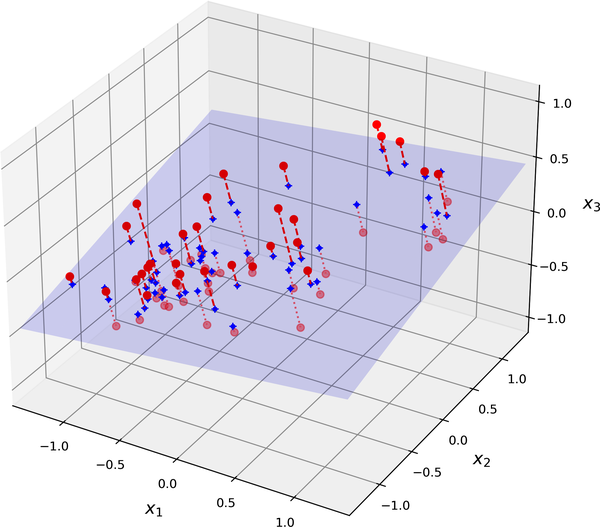

Nhận thấy rằng tất các training instances đề nằm gần như trên 1 mặt phẳng: không gian có số chiều thấp hơn (2D) so với (3D). Nếu ta chiếu các instance theo phương vuông góc lên mặt phẳng phụ này ta sẽ được một dataset 2D mới như sau

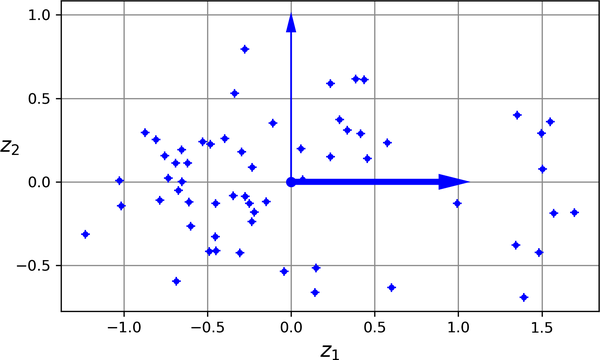

## **Manifold Learning**

Projection không phải lúc nào cũng là cách tiếp cận tốt nhất để giảm chiều. Trong nhiều trường hợp không gian phụ có thể xoắn và xoay giả sử như hình

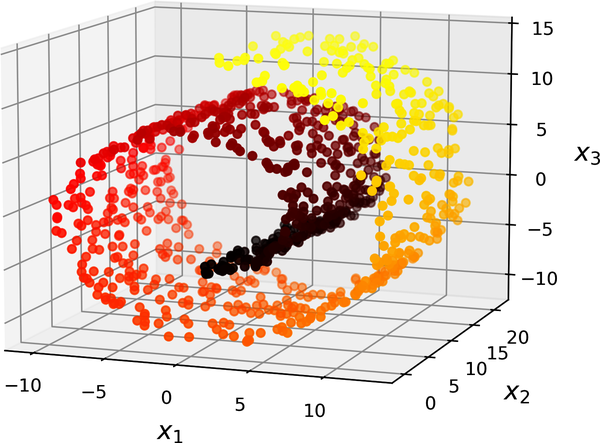

Giả sử chiếu tập dữ liệu trên lên một mặt phẳng ta có thế được như hình bên trái (chiếu lên x3) (đóng cuộn). Thay vào đó ta có thế mong muốn kết quả như hình bên phải (mở cuộn)

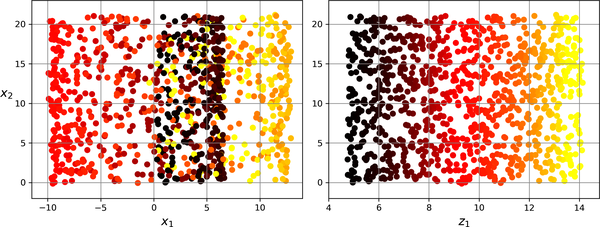

Swiss roll là một ví dụ về 2D *manifold*. Một cách đơn giản, một 2D manifold (đa tạp) là một hình 2D có thể uốn cong và xoắn trong không gian nhiều chiều hơn. Tổng quát hơn, một đa tạp d-chiều là một phần của không gian n chiều (d < n) mà tại từng vùng nhỏ nó trông giống như một siêu phẳng d-chiều. Trong trường hợp Swiss roll như trên, d = 2 và n = 3 nó trông giống như một mặt phẳng 2 chiều ở từng vùng nhỏ, nhưng được cuộn lại ở chiều thứ 3.

Nhiều thuật toán giảm chiều hoạt động bằng cách mô hình hóa đa tạp mà các mẫu huấn luyện nằm trên đó; điều này được gọi là `Manifold Learning`. Phương pháp này dựa trên giả định đa tạp, còn gọi là thuyết đa tạp, cho rằng hầu hết các tập dữ liệu thực tế có số chiều lớn (high-dimensional) đều nằm gần với một đa tạp có chiều thấp hơn nhiều. Giả định thường được thấy bằng thực nghiệm

Giả định đa tạp thường đi kèm với các giả định ngầm khác: rằng bài toán cần giải sẽ trở nên đơn giản hơn nếu được biểu diễn trong không gian có số chiều thấp hơn của đa tạp ví dụ theo hình dưới. Tuy nhiên không phải giả định ngầm lúc nào cũng đúng. Nói chung giảm chiều của tập training trước khi train thường tăng tốc độ training, nhưng không phải lúc nào nó cũng là giải pháp tốt hơn, nó phụ thuộc vào dataset.

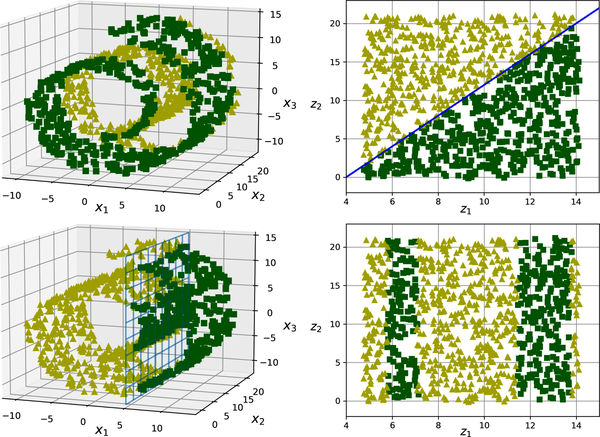

# **PCA**

*Principal component analysis*  (PCA) là thuật toán giảm chiều phổ biến nhất hiện nay. Đầu tiên nó xác định một siêu mặt phẳng gần nhất với dữ liệu nhất sau đó chiếu tập dữ liệu lên mặt phẳng đó

## **Preserving the Variance**

Trước khi chiếu tập training lên một siêu mặt phẳng có chiều thấp hơn, trước hết cần chọn đúng siêu mặt phẳng. Ví dụ, một bộ dữ liệu 2D đơn giản như hình bên trái, cùng với ba trục khác nhau (tức là 3 siêu mặt phẳng 1D). Hình bên phải là kết quả của phép chiếu. Như vậy ta có thể thấy cách chọn siêu mặt phẳng khác nhau sẽ có sự mất mát dữ liệu khác nhau. Tức là lựa chọn sao cho giảm thiểu khoảng cách bình phương trung bình giữa tập dữ liệu gốc và phép chiếu của nó lên trục đó. Đây là ý tưởng đằng sau PCA

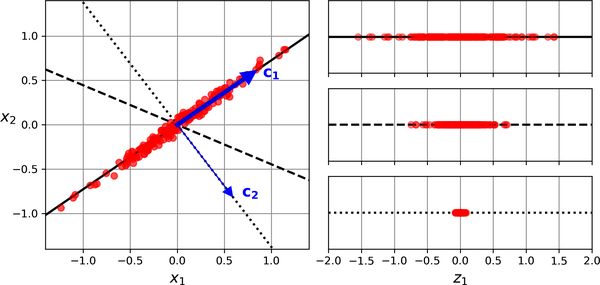

## **Principal Componenents**

PCA xác định trục mà trên đó dữ liệu huấn luyện có phương sai lớn nhất. Trong Hình 8-7, đó là đường liền nét. Nó cũng tìm ra một trục thứ hai, vuông góc với trục đầu tiên, trên đó phương sai còn lại là lớn nhất. Trong ví dụ 2 chiều này, không có lựa chọn nào khác: đó chính là đường nét đứt. Nếu là một tập dữ liệu có số chiều cao hơn, PCA cũng sẽ tìm ra trục thứ ba, vuông góc với cả hai trục trước đó, rồi trục thứ tư, thứ năm, v.v...—tổng cộng bằng với số chiều của tập dữ liệu.

Trục thứ $i^{th}$ được gọi là principal components (PC) thứ i của dữ liệu. Trong hình trên, PC đầu tiên là đường c1 và PC thứ hai là c2

Vậy làm thế nào để tìm được PC của tập training? Người ta sử dụng kĩ thuật phân tích ma trận chuẩn được gọi là phân tích giá trị kỳ dị (SVD) nó có thể phân tích ma trận tập huấn luyện X thành phép nhân ba ma trận U Σ V.T , trong đó V chứa các vectơ đơn vị xác định tất cả các thành phần chính mà bạn đang tìm kiếm, như hình


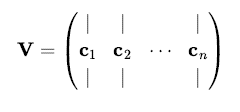

In [16]:
# generate a simple 3D dataset (like notebook)

import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # shift a bit

In [17]:
#example

import numpy as np
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt[0]
c2 = Vt[1]

print(c1)
print(c2)

[0.67857588 0.70073508 0.22023881]
[-0.72817329  0.6811147   0.07646185]


## **Projecting Down to d Dimensions**

Thực hiện theo công thức


$\mathbf{X}_{d-proj} = \mathbf{X} \mathbf{W}_{d}$

trong đó $\mathbf{X}_{d-proj}$ là ma trận sau khi giảm chiều, $\mathbf{W}_{d}$ là ma trận chứa d PC đầu tiên của $\mathbf{V}$


## **Using Scikit-Learn**

Lớp PCA sử dụng SVD để triển khai. n_components = d-proj ở trên.

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

Sau khi fit thuộc tính `components_` sẽ có giá trị giống với $\mathbf{W}_d$

In [19]:
pca.components_

array([[ 0.67857588,  0.70073508,  0.22023881],
       [ 0.72817329, -0.6811147 , -0.07646185]])

## **Explained Variance Ratio**

In [20]:
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

Tỷ lệ này cho biết tỷ lệ phương sai của tập dữ liệu nằm dọc theo từng thành phần chính (PC). Đầu ra này cho chúng ta biết rằng khoảng 76% phương sai của tập dữ liệu nằm dọc theo PC đầu tiên và khoảng 15% nằm dọc theo PC thứ hai. Điều này để lại khoảng 9% cho PC thứ ba, vì vậy có lý khi cho rằng PC thứ ba có thể mang ít thông tin.

## **Choosing the Right Number of Dimensions**

Thay vì tùy ý chọn số chiều, sẽ đơn giảm hơn khi chọn số chiều mà tổng phương sai của các chiều khoảng 95% (Nếu để trực quan hóa thì tốt nhất nên là 2 hoặc 3)

In [21]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np

mnist = fetch_openml('mnist_784', as_frame = False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d


np.int64(154)

Trên đây là đoạn code chia tập MNIST và thực hiện PCA mà không giảm chiều, sau đó tính toán số lượng chiều ít nhất để đạt được 95% phương sai trên tập training

Thay vì chỉ định số lượng PC ta có thể đặt n_components trong khoảng từ 0.0 đến 1.0 chỉ tỉ lệ của phương sai muốn bảo toàn


In [22]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_reduced.shape

(60000, 154)

Nếu ta sử dụng giảm chiều như một bước tiền xử lí cho một nhiệm vụ học có giám sát, sau đó bạn có thể điều chỉnh số chiều như bạn làm với bất kỳ siêu tham số nào khác, ví dụ xem code dưới


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PCA(random_state=42),
                    RandomForestClassifier(random_state=42))

param_distrib = {
    "pca__n_components": np.arange(10, 80),
    "randomforestclassifier__n_estimators": np.arange(50, 500)
}

rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3, random_state=42)
rnd_search.fit(X_train[:1000],  y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [24]:
rnd_search.best_params_

{'randomforestclassifier__n_estimators': np.int64(475),
 'pca__n_components': np.int64(57)}

## **PCA for Compression**

Ở ví dụ trên việc giảm chiều dữ liệu MNIST kết quả thu được còn 154 features từ bộ dữ liệu gốc là 784. Tức là bộ dữ liệu hiện tại đã nhỏ hơn 20% với dữ liệu gốc và chỉ mất 5% phương sai của nó. Đây là một tỉ lệ hợp lí và làm tăng đáng kể tốc độ của thuật toán.

Ta cũng có thể giải nén bộ dữ liệu đã giảm chiều bằng cách sử dụng  biến đổi ngược của phép chiếu PCA. Nó không đưa chúng ta bộ dữ liệu gốc (5% phương sai đã mất trong quá trình compress) nhưng gần giống với ban đầu. Khoảng cách bình phương trung bình giữa dữ liệu gốc và dữ liệu được tái tạo (đã nén và sau đó giải nén) được gọi là lỗi tái tạo `(reconstruction error)`

In [25]:
X_recovered = pca.inverse_transform(X_reduced)

Công thức được sử dụng:

$\mathbf{X}_{recorvered} = \mathbf{X}_{d-proj} \mathbf{W}_{d}^T$


## **Randomized PCA**

Nếu đặt svd_solver = "randomized", PCA sẽ sử dụng thuật toán `randomized PCA` sẽ nhanh chóng tìm ra xấp xỉ của d PC đầu tiên. Nó có độ phức tạp $O(m \times d^2) + O(d^3)$ thay vì $O(m \times n^2) + O(n^3)$. Nên nó đặc biệt nhanh hơn full SVD khi d < n rất nhiều

In [26]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit(X_train)

## **Incremental PCA**

Một vấn đề với các triển khai PCA trước đó là chúng yêu cầu toàn bộ tập huấn luyện phải vừa với bộ nhớ để thuật toán có thể chạy. Incremental PCA (IPCA) là một thuật toán được phát triển cho phép chia tập training thành các lô nhỏ và đưa chúng vào từng lô nhỏ một. Điều này hữu ích cho các tập huấn luyện lớn và để áp dụng PCA trực tuyến (ví dụ: khi đang chạy, các trường hợp mới xuất hiện).

In [27]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

Ngoài ra, bạn có thể sử dụng lớp memmap của NumPy, cho phép bạn thao tác một mảng lớn được lưu trữ trong tệp nhị phân trên đĩa như thể nó hoàn toàn nằm trong bộ nhớ; lớp này chỉ tải dữ liệu cần thiết trong bộ nhớ, khi cần. Để chứng minh điều này, trước tiên chúng ta hãy tạo một tệp ánh xạ bộ nhớ (memmap) và sao chép tập huấn luyện MNIST vào đó, sau đó gọi flush() để đảm bảo rằng bất kỳ dữ liệu nào vẫn còn trong bộ nhớ đệm đều được lưu vào đĩa. Trong thực tế, X_train thường không vừa trong bộ nhớ, vì vậy bạn sẽ tải từng khối và lưu từng khối vào phần bên phải của mảng memmap:

In [28]:
filename = "my_mnist.nmap"
X_mmap = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mmap[:] = X_train # could be a loop instead, saving the data chunk by chunk
X_mmap.flush()

Tiếp theo, chúng ta có thể tải tệp memmap và sử dụng nó như một mảng NumPy thông thường. Sử dụng IncrementalPCA để giảm chiều. Vì thuật toán này chỉ sử dụng một phần nhỏ của mảng tại một thời điểm nhất định nên việc sử dụng bộ nhớ vẫn được kiểm soát 

In [29]:
X_mmap = np.memmap(filename, dtype="float32", mode="readonly").reshape(-1, 784)
batch_size = X_mmap.shape[0] // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mmap)

IncrementalPCA(batch_size=600, n_components=154)

Với bộ dữ liệu nhiều chiều, PCA có thể rất chậm. Mặc dù bạn sử dụng randomized PCA độ phức tạp vẫn là $O(m \times d^2) + O(d^3)$. Vì vậy d không được quá lớn. Nếu đang xử lý một tập dự liệu có hàng chục nghìn feature (ex: image), thì việc training có thể trở nên quá chậm: trong trường hợp này, nên cân nhắc sử dụng `random project` thay thế

# **Random Project**

Thuật toán này chiếu dữ liệu lên một không gian thấp chiều hơn sử dụng một phép chiếu tuyến tính ngẫu nhiên. Đã được chứng minh phép chiếu ngẫu nhiên như vậy thực sự rất có khả năng bảo toàn khoảng cách khá tốt. Tức là, hai trường hợp tương tự sẽ vẫn tương tự sau phép chiếu, và hai trường hợp rất khác nhau sẽ vẫn rất khác nhau.

Rõ ràng là bạn càng bỏ nhiều chiều, thì càng mất nhiều thông tin và càng làm méo mó nhiều khoảng cách. Vậy làm sao bạn có thể chọn được số chiều tối ưu. Johnson và Lindenstrauss đã đưa ra một phương trình xác định số chiều tối thiểu cần bảo toàn để đảm bảo—với xác suất cao—rằng khoảng cách sẽ không thay đổi nhiều hơn một dung sai nhất định. Phương trình này được thực hiện bởi hàm johnson_lindenstrauss_min_dim(). Với công thức $d \geq 4 log(m) / (1/2 ε^2 - 1/3 ε^2)$

Ví dụ, nếu bạn có một tập dữ liệu chứa m = 5.000 trường hợp với n = 20.000 tính năng mỗi trường hợp và bạn không muốn bình phương khoảng cách giữa bất kỳ hai trường hợp nào thay đổi nhiều hơn ε = 10%, thì bạn nên chiếu dữ liệu xuống d chiều

In [30]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim
m, ε = 5_000, 0.1
d = johnson_lindenstrauss_min_dim(m, eps=ε)
d

np.int64(7300)

In [31]:
n = 20_000
np.random.seed(42)
P = np.random.randn(d, n) / np.sqrt(d) # std dev = square root of variance
X = np.random.randn(m, n) # generate a fake dataset
X_reduced = X @ P.T

# generate dataset using Gaussian distribution with mean 0 and variance 1 / d

In [32]:
X_reduced[0:5]

array([[ 0.65601016, -1.52157349, -2.13016582, ..., -3.30298058,
         1.86509223, -0.62205374],
       [-1.15983875, -1.31973727,  0.13553982, ..., -0.9461484 ,
        -0.01875402,  1.15834454],
       [-2.79258363,  0.47631317, -3.2293912 , ...,  1.41899815,
         3.03817514, -2.07598188],
       [-2.14840823,  1.03847532,  3.01095365, ..., -0.89203294,
        -0.57585145, -2.366737  ],
       [-0.38741148,  0.31891814, -2.37018489, ..., -0.38222154,
        -0.47099224,  0.96012372]])

In [33]:
from sklearn.random_projection import GaussianRandomProjection
# GaussianRandomProjection using johnson_lindenstrauss_min_dim() if using fit() to determine the output dimensionality
gaussian_rnd_proj = GaussianRandomProjection(eps=ε, random_state=42)
X_reduced = gaussian_rnd_proj.fit_transform(X) # same result as above
X_reduced[0:5]

array([[ 0.65601016, -1.52157349, -2.13016582, ..., -3.30298058,
         1.86509223, -0.62205374],
       [-1.15983875, -1.31973727,  0.13553982, ..., -0.9461484 ,
        -0.01875402,  1.15834454],
       [-2.79258363,  0.47631317, -3.2293912 , ...,  1.41899815,
         3.03817514, -2.07598188],
       [-2.14840823,  1.03847532,  3.01095365, ..., -0.89203294,
        -0.57585145, -2.366737  ],
       [-0.38741148,  0.31891814, -2.37018489, ..., -0.38222154,
        -0.47099224,  0.96012372]])

`GaussianRandomProjection` khi gọi fit() nó sẽ sử dụng johnson_lindenstrauss_min_dim() để xác định chiều đầu ra, sau đó nó tạo một ma trận ngẫu nhiên lưu trữ trong `components_`. Sau đi khi gọi transform(), nó sử dụng ma trận này để thực hiện phép chiếu.

Scikit-Learn cũng cung cấp một bộ biến đổi chiếu ngẫu nhiên thứ hai, được gọi là `SparseRandomProjection`. Nó xác định số chiều của mục tiêu giống như Gau, tạo ra một ma trận ngẫu nhiên có cùng hình dạng và thực hiện phép chiếu giống hệt nhau. Sự khác nhau là random matrix là sparse. Nghĩa là nó sử dụng ít bộ nhớ hơn. Và nó cũng nhanh hơn nhiều, cả trong việc tạo ra ma trận ngẫu nhiên và giảm tính đa chiều. Hơn nữa, nếu đầu vào thưa thớt (sparse), phép biến đổi sẽ giữ cho đầu vào thưa thớt (trừ khi bạn đặt dense_output=True). Cuối cùng, nó có cùng thuộc tính bảo toàn khoảng cách như phương pháp trước đó và chất lượng giảm chiều là tương đương. Tóm lại, thường thì tốt hơn là sử dụng bộ biến đổi này thay vì bộ biến đổi đầu tiên, đặc biệt là đối với các tập dữ liệu lớn hoặc thưa thớt.

Tỉ lệ r của các phần từ khác 0 trong sparse random matrix được gọi là mật độ (dentisy). Mặc định bằng $1 / \sqrt{n}$. Mỗi ô trong sparse random matrix có xác suất r khác không và mỗi giá trị khác không là –v hoặc +v (cả hai đều có khả năng xảy ra như nhau), trong đó $v = 1 / \sqrt{dr}$.

In [34]:
components_pinv = np.linalg.pinv(gaussian_rnd_proj.components_)
X_recovered = X_reduced @ components_pinv.T

# **LLE**

`Locally linear embedding (LLE)` kĩ thuật giảm chiều phi tuyến `(nonlinear dimensionality reduction(NLDR))`. Đây là một kỹ thuật học tập đa dạng không dựa vào phép chiếu, không giống như PCA và random project. Nói một cách ngắn gọn, LLE hoạt động bằng cách đầu tiên đo lường cách mỗi trường hợp đào tạo liên quan tuyến tính đến các láng giềng gần nhất của nó, sau đó tìm kiếm một biểu diễn chiều thấp của tập đào tạo nơi các mối quan hệ cục bộ này được bảo toàn tốt nhất. Cách tiếp cận này làm cho nó đặc biệt tốt trong việc mở rộng các đa tạp xoắn, đặc biệt là khi không có quá nhiều nhiễu.

In [35]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

# generate swiss roll sample
X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X_swiss)

In [36]:
t # contain the position of each instance along the rolled axis of swiss roll, it can be used as a target in nonlinear regression task

array([ 8.24234644, 13.67266022, 11.61126935, 10.35461227,  6.18283002,
        6.1826027 ,  5.25981413, 12.87590683, 10.37776449, 11.38581581,
        4.90639327, 13.85357398, 12.55797604,  6.71363795,  6.42604892,
        6.44093576,  7.57980457,  9.65810183,  8.78337487,  7.45715896,
       10.47896666,  6.02708764,  7.46578743,  8.16526801,  9.01074732,
       12.11249808,  6.59427004,  9.55893438, 10.29576475,  5.15017381,
       10.43836431,  6.31954098,  5.3254858 , 13.65542448, 13.81325648,
       12.33135449,  7.58330612,  5.63292697, 11.16113333,  8.8607285 ,
        5.86257225,  9.37932141,  5.03649316, 13.28253187,  7.15133285,
       10.9565144 ,  7.65019666,  9.6139146 ,  9.86501197,  6.45460118,
       13.85050881, 12.01784373, 13.5669579 , 13.14593807, 10.34746352,
       13.40084895,  5.54641116,  6.55948394,  5.13864614,  7.77855511,
        8.37558613,  7.26979335, 12.52305599,  8.07470987,  7.36013436,
        9.82717906,  6.04056851, 12.2729174 ,  5.41501224, 14.01

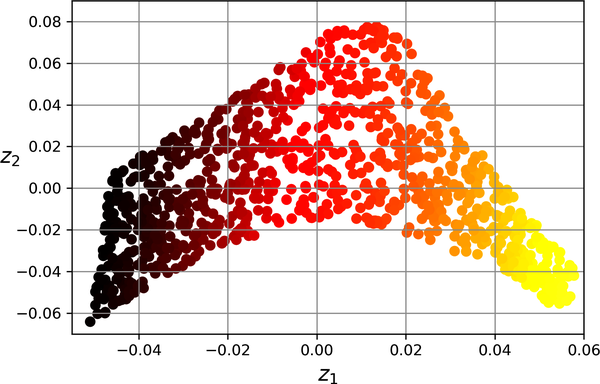

Khoảng cách được bảo toàn khá tốt tuy nhiên không được bảo toàn ở quy mô lớn, cuộn swiss roll không cuộn nên là hình chữ nhật. Tuy nhiên LLE đã làm việc khá tốt việc mô hình hóa đa tạp

Cách LLE làm việc:

Với mỗi training instance $\mathbf{X}^{(i)}$, thuật toán sẽ xác định k hàng xóm gần nó nhất, sau đó cố gắng tái tạo $\mathbf{X}^{(i)}$ như một hàm tuyến tính của những hàng xóm. Cụ thể nó cố gắng tìm các trọng số $w_{i,j}$ để bình phương khoảng cách giữa $\mathbf{x}^{(i)}$ và $\sum_{j=1}^m w_{i,j} \mathbf{x}^{(j)}$ nhỏ nhất có thể. $w_{i,j} = 0$ nếu $\mathbf{x}^{(j)}$ không phải hàng xóm của điểm đang xét

Vậy bước đầu của LLE là bài toán tối ưu được mô tả bằng công thức 

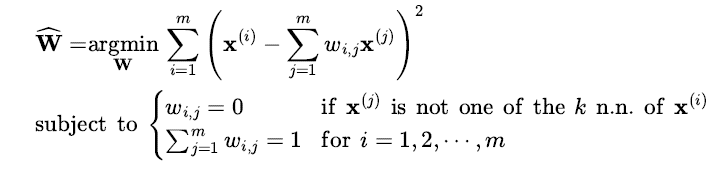

Sau bước này ma trận trọng số mã hóa mối quan hệ tuyến tính giữa các instancé. là Bước thứ hai là ánh xạ các trường hợp đào tạo vào không gian d chiều (trong đó d < n) trong khi vẫn bảo toàn các mối quan hệ cục bộ này càng nhiều càng tốt. Nếu $\mathbf{z}^{(i)}$ là ánh xạ của $\mathbf{x}^{(i)}$ trong không gian d-chiều. Ta muốn bình phương khoảng cách giữa $\mathbf{z}^{(i)}$ và $\sum_{j=1}^m w_{i,j} \mathbf{z}^{(j)}$ nhỏ nhất có thể. Ta có công thức sau đây

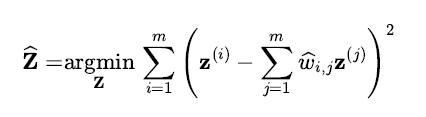

Triển khai LLE của Scikit-Learn có độ phức tạp tính toán sau: $O(m log(m)n log(k))$ để tìm k-gần nhất, $O(mnk^3)$ để tối ưu hóa trọng số và $O(dm^2)$ để xây dựng các biểu diễn chiều thấp. Thật không may, $m^2$ trong bước cuối cùng khiến thuật toán này không mở rộng được đến các tập dữ liệu rất lớn.

# Other Dimensionality Reduction Techniques

*sklearn.manifold.MDS*

-   Multidimensional scaling (MDS) giảm số chiều của dữ liệu trong khi cố gắng bảo toàn khoảng cách giữa các điểm dữ liệu. Phép chiếu ngẫu nhiên (random projection) cũng làm điều này cho dữ liệu có số chiều cao, nhưng nó không hoạt động tốt đối với dữ liệu có số chiều thấp.

*sklearn.manifold.Isomap*

- Isomap tạo một đồ thị bằng cách kết nối mỗi điểm dữ liệu với các điểm lân cận gần nhất của nó, sau đó giảm số chiều trong khi cố gắng bảo toàn khoảng cách địa lý (geodesic) giữa các điểm. Khoảng cách địa lý giữa hai nút trong một đồ thị là số lượng nút trên đường đi ngắn nhất nối hai nút đó.

*sklearn.manifold.TSNE*

- t-SNE (t-distributed stochastic neighbor embedding – nhúng lân cận ngẫu nhiên phân phối t) giảm số chiều trong khi cố gắng giữ cho các điểm dữ liệu tương tự nằm gần nhau và các điểm khác biệt nằm xa nhau. Kỹ thuật này chủ yếu được sử dụng để trực quan hóa, đặc biệt là để hiển thị các cụm dữ liệu trong không gian nhiều chiều. Ví dụ, trong các bài tập ở cuối chương này, bạn sẽ sử dụng t-SNE để trực quan hóa một bản đồ 2D của các ảnh MNIST.

*sklearn.discriminant_analysis.LinearDiscriminantAnalysis*

- LDA (Linear Discriminant Analysis – Phân tích phân biệt tuyến tính) là một thuật toán phân loại tuyến tính, trong quá trình huấn luyện sẽ học ra các trục phân biệt tốt nhất giữa các lớp. Các trục này sau đó có thể được sử dụng để xác định một siêu phẳng (hyperplane) nhằm chiếu dữ liệu lên đó. Lợi ích của phương pháp này là phép chiếu sẽ giữ cho các lớp càng cách xa nhau càng tốt, vì vậy LDA là một kỹ thuật tốt để giảm số chiều trước khi chạy một thuật toán phân loại khác (trừ khi bản thân LDA đã đủ để phân loại).

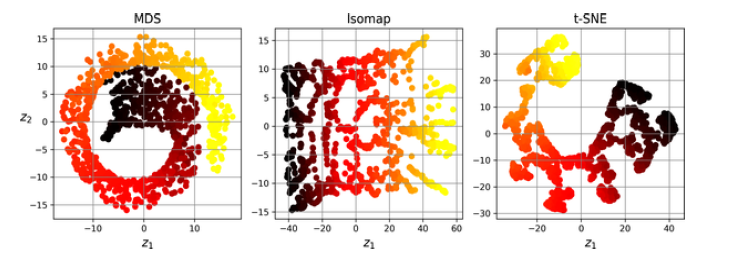

# Exercises

## 1

**Question: What are the main motivations for reducing a dataset’s dimensionality? What are the main drawbacks?**

Động lực chính để giảm chiều là:

- Tăng tốc độ đào tạo (trong một vài trường hợp nó cũng có thể loại bỏ nhiễu và các feature không cần thiết, tăng hiệu suất của thuật toán huấn luyện)
- Để có thể trực quan hóa dữ liệu và hiểu rõ hơn về các feature quan trọng
- Tiết kiệm không gian (nén)

Các nhược điểm chính:

- Có thể có mất mát thông tin, suy giảm hiệu suất của các thuật toán đào tạo tiếp theo
- Có thể cần tính toán phức tạp
- Gây thêm phức tạp cho ML pipeline
- Các feature biến đổi thường khó diễn giải


## 2

**Question: What is the curse of dimensionality?**

## 9

**Question: Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a random forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new random forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next, evaluate the classifier on the test set. How does it compare to the previous classifier? Try again with an SGDClassifier. How much does PCA help now?**

In [37]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

X_train = mnist.data[:60000]
y_train = mnist.target[:60000]

X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [39]:
%time rnd_clf.fit(X_train, y_train)

CPU times: total: 32 s
Wall time: 32.9 s


RandomForestClassifier(random_state=42)

In [40]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9705

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [42]:
rnd_clf_with_pca = RandomForestClassifier(n_estimators=100, random_state=42)
%time rnd_clf_with_pca.fit(X_train_reduced, y_train)


CPU times: total: 1min 32s
Wall time: 1min 35s


RandomForestClassifier(random_state=42)

Tốc độ của mô hình chậm đi nhiều => không phải lúc nào giảm chiều việc giảm chiều dữ liệu cũng làm mô hình training nhanh hơn, nó phụ thuộc vào tập dữ liệu, mô hình và thuật toán training.

In [43]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf_with_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9488

Thử lại với SGDClassifier

In [44]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
%time sgd_clf.fit(X_train, y_train)

CPU times: total: 1min 21s
Wall time: 1min 23s


SGDClassifier(random_state=42)

In [45]:
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.874

Với dữ liệu chưa được giảm chiều SGD hoạt động kém hiệu quả hơn RandomForest

In [46]:
sgd_clf_with_pca = SGDClassifier(random_state=42)
%time sgd_clf_with_pca.fit(X_train_reduced, y_train)

CPU times: total: 17.9 s
Wall time: 18.4 s


SGDClassifier(random_state=42)

In [50]:
y_pred_with_pca = sgd_clf_with_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred_with_pca)

0.8959

Đối với SGDClassifier PCA tăng tốc thuật toán training gấp 5 lần và cải thiện 1 chút hiệu suất của mô hình, nhưng **nó vẫn phụ thuộc vào bộ dữ liệu**

## **10**

**Question: Use t-SNE to reduce the first 5,000 images of the MNIST dataset down to 2 dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can replace each dot in the scatterplot with the corresponding instance’s class (a digit from 0 to 9), or even plot scaleddown versions of the digit images themselves (if you plot all digits the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms, such as PCA, LLE, or MDS, and compare the resulting visualizations.**

In [51]:
X_sample, y_sample = X_train[:5000], y_train[:5000]

In [52]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, init='random', learning_rate='auto')
%time X_reduced = tsne.fit_transform(X_sample)

CPU times: total: 1min 10s
Wall time: 12.4 s


In [53]:
X_reduced[:5]

array([[ 26.974533, -12.360949],
       [  8.203907, -65.964615],
       [ 53.42725 ,  15.134594],
       [-43.52786 ,  33.807606],
       [ 18.251623,  27.080006]], dtype=float32)

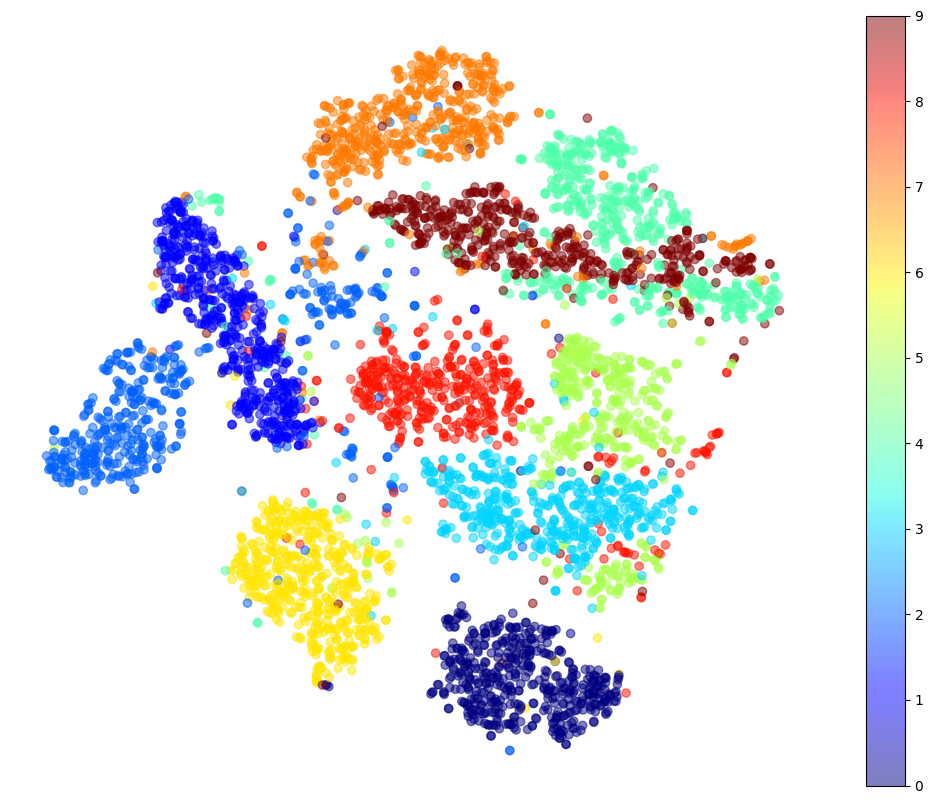

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_sample.astype(np.int8), alpha=0.5, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

Hầu hết các chữ số điều phân chia khá tốt so với các số khác mặc dù t-SNE không được đưa các target (nhãn ban đầu), nó chỉ xác định các cụm ảnh gần tương tự nhau, tuy nhiên cụm 4 và 9, 5 và 3 bị đè lên nhay nhiều

(np.float64(-56.71350326538086),
 np.float64(65.56142654418946),
 np.float64(-73.17799377441406),
 np.float64(73.947509765625))

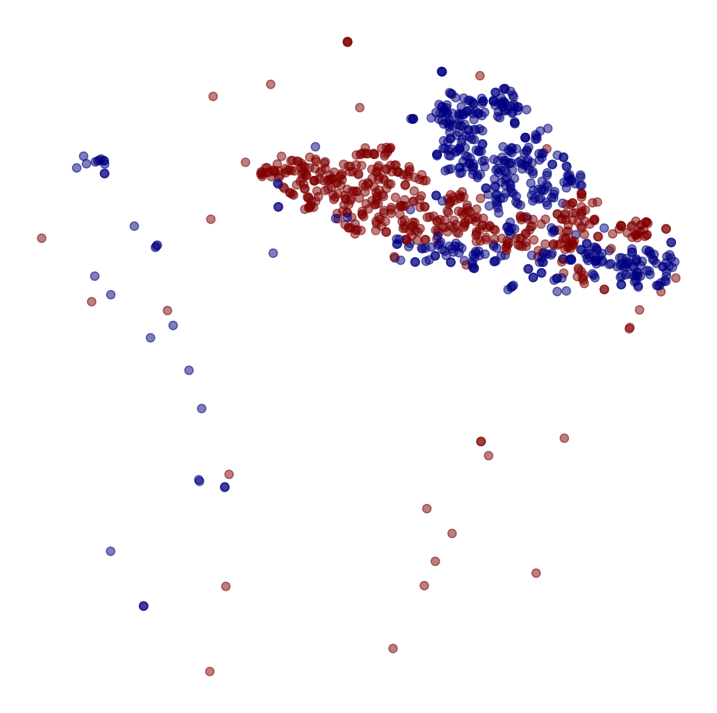

In [ ]:
# focus on 4 and 9
X_sample_4_9_reduced = X_reduced[(y_sample == '4') | (y_sample == '9')]
y_sample_4_9 = y_sample[(y_sample == '4') | (y_sample == '9')]

plt.figure(figsize=(9, 9))
plt.scatter(X_sample_4_9_reduced[:, 0], X_sample_4_9_reduced[:, 1], c=y_sample_4_9.astype(np.int8), alpha=0.5, cmap='jet')
plt.axis('off')

In [ ]:
X_sample_4_9 = X_sample[(y_sample == '4') | (y_sample == '9')]

tsne_sub = TSNE(n_components=2, random_state=42, init='random', learning_rate='auto')
X_subset_reduced = tsne_sub.fit_transform(X_sample_4_9)

X_sample_4_9.shape: (1030, 784) type: <class 'pandas.core.frame.DataFrame'>
X_subset.shape: (1030, 784) type: <class 'pandas.core.frame.DataFrame'>


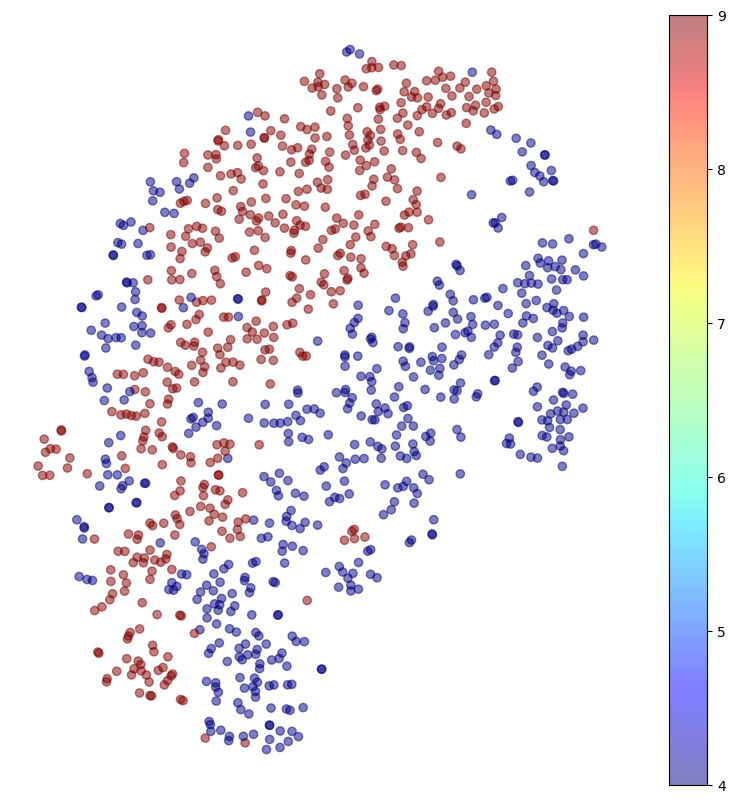

In [87]:
plt.figure(figsize=(10, 10))
plt.scatter(X_subset_reduced[:, 0], X_subset_reduced[:, 1], c=y_sample_4_9.astype(np.int8), alpha=0.5, cmap='jet')
plt.axis('off')
plt.colorbar()